In [1]:
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
y = to_categorical(y)
y.shape

(1000, 3)

In [2]:
import pandas as pd

In [3]:
train = pd.read_csv('tabular-playground-series-jun-2021/train.csv')
test = pd.read_csv('tabular-playground-series-jun-2021/test.csv')

In [4]:
# Train data
train.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
0,0,0,0,6,1,0,0,0,0,7,...,0,0,0,0,0,0,2,0,0,Class_6
1,1,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,1,0,Class_6
2,2,0,0,0,0,0,1,0,3,0,...,0,0,0,0,1,0,0,0,0,Class_2
3,3,0,0,7,0,1,5,2,2,0,...,0,4,0,2,2,0,4,3,0,Class_8
4,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_2


In [5]:
# Test data
test.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
0,200000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,200001,1,2,0,0,0,0,0,0,0,...,3,1,3,0,0,0,0,3,0,0
2,200002,0,1,7,1,0,0,0,0,6,...,3,0,0,0,0,3,0,2,0,0
3,200003,0,0,0,4,3,1,0,0,0,...,0,0,0,1,0,0,0,4,0,0
4,200004,0,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
# Checking Null data
train.isnull().values.any()
test.isnull().values.any()

False

In [7]:
train = train.drop('id', axis=1)
test = test.drop('id', axis=1)

In [8]:
train

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
0,0,0,6,1,0,0,0,0,7,0,...,0,0,0,0,0,0,2,0,0,Class_6
1,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,1,0,Class_6
2,0,0,0,0,0,1,0,3,0,0,...,0,0,0,0,1,0,0,0,0,Class_2
3,0,0,7,0,1,5,2,2,0,1,...,0,4,0,2,2,0,4,3,0,Class_8
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,1,6,0,1,32,0,6,0,0,...,0,1,1,0,0,0,4,1,0,Class_6
199996,0,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_6
199997,1,2,0,0,0,2,0,1,8,4,...,1,0,1,1,1,0,1,0,0,Class_8
199998,0,0,2,0,2,1,0,0,3,1,...,0,0,3,2,1,0,0,1,0,Class_7


In [9]:
# for i in range(75):
#     mean, std = train[f'feature_{i}'].mean(), train[f'feature_{i}'].std()
#     train[f'feature_{i}'] = train[f'feature_{i}'].apply(lambda x : (x-mean)/std)
#     test[f'feature_{i}'] = test[f'feature_{i}'].apply(lambda x : (x-mean)/std)

In [10]:
train

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
0,0,0,6,1,0,0,0,0,7,0,...,0,0,0,0,0,0,2,0,0,Class_6
1,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,1,0,Class_6
2,0,0,0,0,0,1,0,3,0,0,...,0,0,0,0,1,0,0,0,0,Class_2
3,0,0,7,0,1,5,2,2,0,1,...,0,4,0,2,2,0,4,3,0,Class_8
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,1,6,0,1,32,0,6,0,0,...,0,1,1,0,0,0,4,1,0,Class_6
199996,0,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_6
199997,1,2,0,0,0,2,0,1,8,4,...,1,0,1,1,1,0,1,0,0,Class_8
199998,0,0,2,0,2,1,0,0,3,1,...,0,0,3,2,1,0,0,1,0,Class_7


In [11]:
test

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,0,0,0,0,0,0,0,0,...,3,1,3,0,0,0,0,3,0,0
2,0,1,7,1,0,0,0,0,6,0,...,3,0,0,0,0,3,0,2,0,0
3,0,0,0,4,3,1,0,0,0,0,...,0,0,0,1,0,0,0,4,0,0
4,0,0,5,0,0,0,0,0,0,8,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
99998,0,0,0,0,2,2,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0


In [12]:
label_dict = {val:idx for idx, val in enumerate(sorted(train['target'].unique()))}
train['target'] = train['target'].map(label_dict)

target = train['target']
train.drop(['target'], inplace=True, axis=1)

In [13]:
target

0         5
1         5
2         1
3         7
4         1
         ..
199995    5
199996    5
199997    7
199998    6
199999    7
Name: target, Length: 200000, dtype: int64

In [14]:
train = train.values
target = target.values
target =  to_categorical(target)

In [15]:
target

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.1, random_state = 2, stratify=target)

In [17]:
X_train.shape
target.shape

(200000, 9)

In [18]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
model = Sequential([
        Dense(512, input_dim=75, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(9, activation='softmax')
    ])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               38912     
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [20]:
history = model.fit(X_train, y_train,
          batch_size = 100, epochs = 20, verbose = 2,
          validation_data=(X_val, y_val));

Epoch 1/20
1800/1800 - 6s - loss: 1.8897 - accuracy: 0.3216 - val_loss: 1.7726 - val_accuracy: 0.3577
Epoch 2/20
1800/1800 - 6s - loss: 1.7937 - accuracy: 0.3470 - val_loss: 1.7678 - val_accuracy: 0.3544
Epoch 3/20
1800/1800 - 6s - loss: 1.7814 - accuracy: 0.3499 - val_loss: 1.7659 - val_accuracy: 0.3564
Epoch 4/20
1800/1800 - 5s - loss: 1.7748 - accuracy: 0.3528 - val_loss: 1.7638 - val_accuracy: 0.3568
Epoch 5/20
1800/1800 - 5s - loss: 1.7697 - accuracy: 0.3552 - val_loss: 1.7618 - val_accuracy: 0.3604
Epoch 6/20
1800/1800 - 4s - loss: 1.7648 - accuracy: 0.3567 - val_loss: 1.7616 - val_accuracy: 0.3604
Epoch 7/20
1800/1800 - 5s - loss: 1.7607 - accuracy: 0.3582 - val_loss: 1.7580 - val_accuracy: 0.3616
Epoch 8/20
1800/1800 - 5s - loss: 1.7569 - accuracy: 0.3602 - val_loss: 1.7565 - val_accuracy: 0.3607
Epoch 9/20
1800/1800 - 5s - loss: 1.7533 - accuracy: 0.3616 - val_loss: 1.7611 - val_accuracy: 0.3607
Epoch 10/20
1800/1800 - 5s - loss: 1.7503 - accuracy: 0.3620 - val_loss: 1.7587 - 

In [21]:
score = model.evaluate(X_val, y_val, verbose = 0)
print('Test loss: {}%'.format(score[0] * 100))
print('Test score: {}%'.format(score[1] * 100))
print("MLP Error: %.2f%%" % (100 - score[1] * 100))

Test loss: 176.79498195648193%
Test score: 35.96999943256378%
MLP Error: 64.03%


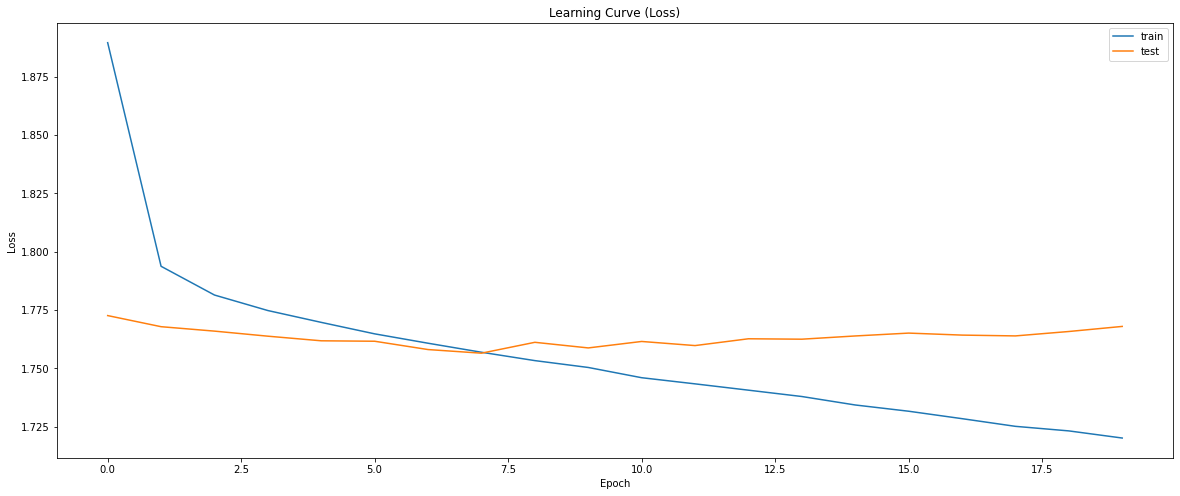

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['train', 'test'], loc='best')
plt.show()

In [23]:
sample_submission = pd.read_csv('tabular-playground-series-jun-2021/sample_submission.csv')
sample_submission[['Class_1','Class_2', 'Class_3', 'Class_4','Class_5','Class_6', 'Class_7', 'Class_8','Class_9']] = model.predict(test)

In [24]:
sample_submission

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,200000,0.061296,0.427633,0.156093,0.026240,0.010305,0.120589,0.024614,0.052006,0.121224
1,200001,0.044412,0.126025,0.068243,0.021349,0.010601,0.235721,0.072158,0.286795,0.134695
2,200002,0.029100,0.058374,0.035521,0.015770,0.009424,0.538916,0.037937,0.192962,0.081996
3,200003,0.034530,0.058585,0.041239,0.026111,0.021809,0.372099,0.082493,0.232667,0.130466
4,200004,0.051274,0.110097,0.080507,0.026735,0.023227,0.206206,0.073381,0.267190,0.161383
...,...,...,...,...,...,...,...,...,...,...
99995,299995,0.068045,0.374123,0.143091,0.030064,0.012135,0.115332,0.037945,0.075379,0.143887
99996,299996,0.054663,0.273383,0.154664,0.028769,0.012152,0.124582,0.051716,0.132474,0.167597
99997,299997,0.062610,0.343394,0.128627,0.032111,0.011869,0.120229,0.045689,0.104237,0.151234
99998,299998,0.049642,0.025065,0.023113,0.013795,0.014044,0.328986,0.076319,0.390406,0.078629
